In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import seaborn as sns
import modelo_ini_corona as cu

In [2]:
path_gas='C:/Users/ccollazos/Documents/Summan/Corona/gas_consumo.csv'
path_temp='C:/Users/ccollazos/Documents/Summan/Corona/Horno4.csv'

In [3]:
dfgas=pd.read_csv(path_gas, low_memory=True, index_col=[0], parse_dates=True, delimiter=';',date_format='%d/%m/%Y', dayfirst=True, decimal=',')
dftemp=pd.read_csv(path_temp, low_memory=True, index_col=[0], parse_dates=True)#, delimiter=';',date_format='%d/%m/%Y %H:%M', dayfirst=True

In [4]:
termo_pares=['k1', 'k2', 'k3', 'k4', 's5', 's6', 's7', 's8', 's9', 's10', 's11','s12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 'k21','k22', 'k23', 'k24', 'k25', 'k26']

In [5]:
dftemp.sort_index(inplace=True)

In [6]:
dftemp=dftemp.resample("min").first()

In [7]:
dftemp=dftemp.interpolate(method='time')

In [8]:
dftemp.loc[:,termo_pares].head(3)

,k1,k2,k3,k4,s5,s6,s7,s8,s9,s10,...,s17,s18,s19,s20,k21,k22,k23,k24,k25,k26
_time,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00-05:00,275.3,192.9,375.3,345.0,543.8,489.0,724.0,735.0,1025.0,1020.0,...,1202.0,1181.0,1101.0,1113.0,658.4,681.7,620.0,520.7,446.9,292.0
2024-01-01 00:01:00-05:00,276.6,191.2,375.9,345.0,544.2,489.0,724.4,735.0,1025.3,1020.0,...,1202.0,1181.0,1101.0,1112.0,659.2,682.5,620.0,520.1,445.8,292.0
2024-01-01 00:02:00-05:00,276.7,191.4,376.2,345.0,545.1,490.0,723.3,736.0,1025.6,1020.0,...,1201.0,1181.0,1101.0,1112.0,660.0,683.1,620.0,519.4,445.0,290.0


In [172]:
dia_analisis='2024-11-06'
dia_analisis_1='2024-07-05'
dia_carro='2024-09-28'

In [173]:
cond_gas=(dfgas.index.to_period('D')==dia_analisis)
cond_temp=((dftemp.index.to_period('D')==dia_analisis) & (dftemp.index.to_period('H')> dia_analisis+' 05:00:00'))
cond_temp_2=((dftemp.index.to_period('D')==dia_analisis_1) & (dftemp.index.to_period('H')> dia_analisis_1+' 05:00:00'))
cond_carro=((dftemp.index.to_period('D')==dia_carro) & (dftemp.index.to_period('H')> dia_carro+' 05:00:00'))

In [138]:
col_temp=['k2','k4','s6','s8','s10','s12','s14','s16','s18','s20','k22','k23','k24','k25','k26']
col_temp_2=['k1','k3','s5','s7','s9','s11','s13','s15','s17','s19','k21','k23','k24','k25','k26']

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

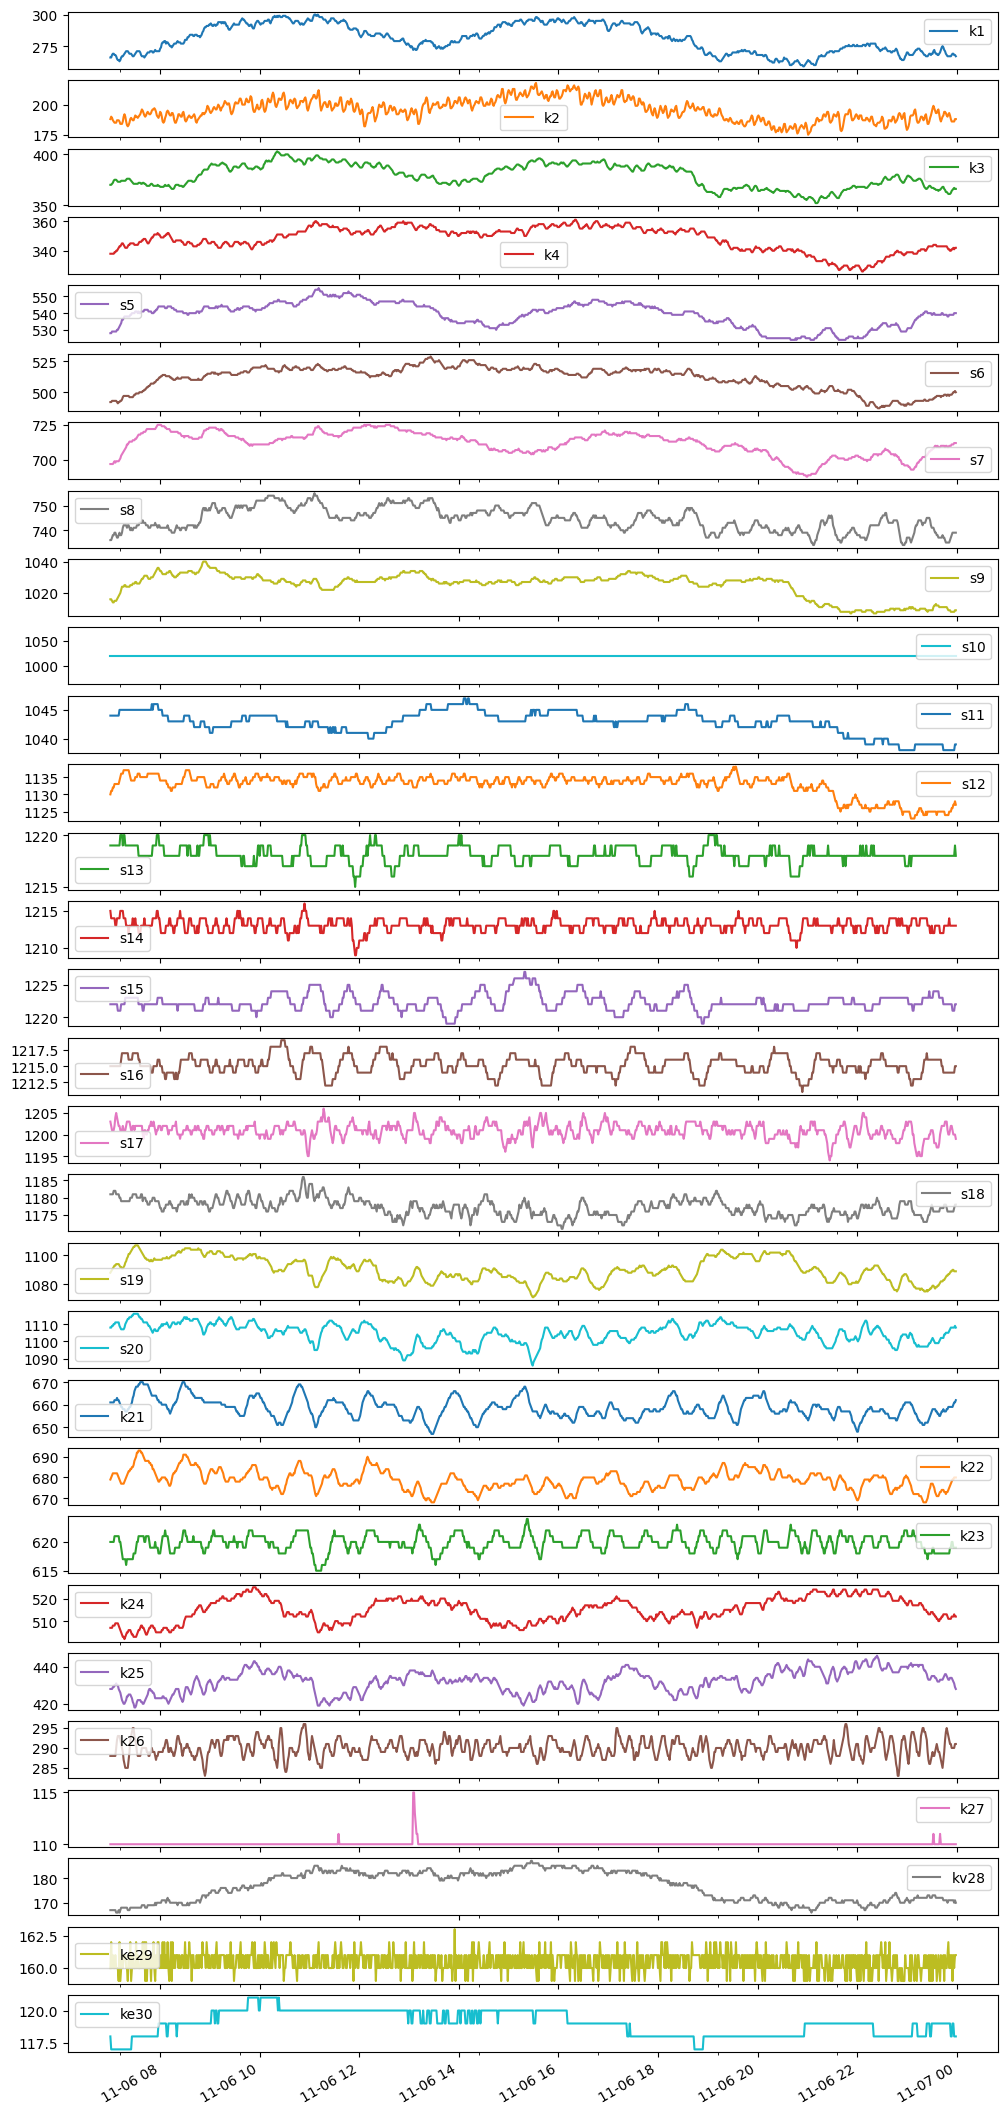

In [119]:
dftemp.iloc[cond_temp].plot(subplots=True, figsize=(12,30))

In [170]:
dftemp_6nov=dftemp.iloc[cond_temp].copy()

In [176]:
distancias=np.array([15.1195,17.2895,21.4885,31.986,38.2845,44.583,50.8815,55.0805,59.2795,63.4785,69.777,71.8765,78.175,82.374,86.573])

In [186]:
horas_=np.floor(distancias/6.5).astype(int)
minutos_=np.floor(((distancias/6.5)-horas_)*60).astype(int)
inicio=np.datetime64('2024-11-06 06:00:00')

In [178]:
horas_,minutos_

(array([ 2,  2,  3,  4,  5,  6,  7,  8,  9,  9, 10, 11, 12, 12, 13]),
 array([19, 39, 18, 55, 53, 51, 49, 28,  7, 45, 44,  3,  1, 40, 19]))

In [179]:
def fecha_hora_carrito(inicio,horas_,minutos_):
    fechas=[]
    for i,j in zip(horas_,minutos_):
        fechas.append(inicio+np.timedelta64(i,'h')+np.timedelta64(j,'m'))
    return np.array(fechas)

In [188]:
def temperaturas_fecha_hora(fechas,columnas_temp,df):
    temp_f=[]
    for i,j in zip(fechas,columnas_temp):
        temp_f.append(df.iloc[df.index==i][j].values[0])
    return np.array(temp_f)

In [189]:
carro=[]
for i in range(8):
    fechas=fecha_hora_carrito(inicio,horas_,minutos_)
    temperaturas=temperaturas_fecha_hora(fechas,col_temp,dftemp_6nov)
    carro.append(temperaturas)
    inicio=inicio+np.timedelta64(13,'m')

In [218]:
def temperaturas_cercanas(fecha_hora,velocidad,distancias,df,empuje:int,col_temp):
    horas_=np.floor(distancias/velocidad).astype(int)
    minutos_=np.floor(((distancias/velocidad)-horas_)*60).astype(int)
    inicio=np.datetime64(fecha_hora)
    carro=[]
    for i in range(8):
        fechas=fecha_hora_carrito(inicio,horas_,minutos_)
        temperaturas=temperaturas_fecha_hora(fechas,col_temp,df)
        carro.append(temperaturas)
        inicio=inicio+np.timedelta64(empuje,'m')
    return carro,fechas,temperaturas

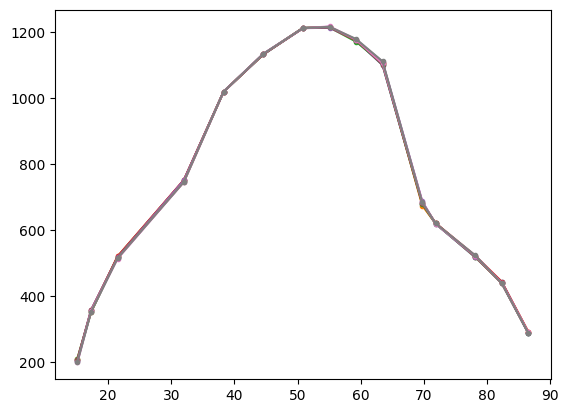

In [190]:
for i in carro:
    plt.plot(distancias,i,'.-')

In [99]:
temp_t=np.array(carro)

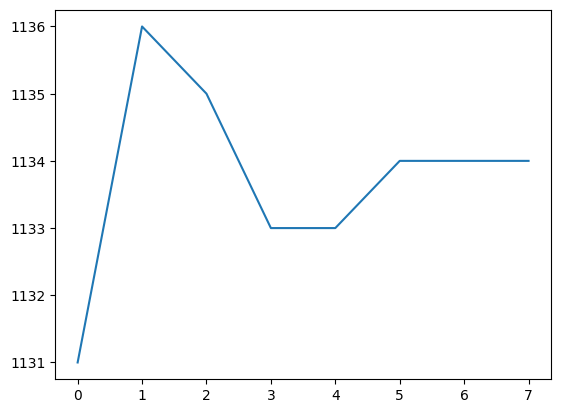

In [105]:
plt.plot(temp_t[:,5])

# Curvas Data Pac

In [9]:
path_curvas='C:/Users/ccollazos/Documents/Summan/Corona/datapac/'
ls_archivos=["H4_Abril2024_103Carros.csv","H4_Dic2023_110Carros.csv","H4_Enero2024_103Carros.csv","H4_Enero2024_106Carros.csv","H4_Julio2024_106Carros.csv","H4_Marzo2024_106Carros.csv","H4_Mayo2024_110Carros.csv","H4_Nov2024_110Carros.csv","H4_Oct2023_110Carros.csv","H4_Oct2024_110Carros.csv","H4_Sept2024_110Carros.csv","H4_Sept282023_110Carros.csv"]

In [10]:
df_curva0=pd.read_csv(path_curvas+ls_archivos[0], delimiter=';',encoding="cp1250", decimal=',',usecols=[0,1,2,3,5,6,8])

In [11]:
#"12:52:26"

In [12]:
df_curva0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time (hh:mm:ss)  1188 non-null   object 
 1   Distance (m)     1188 non-null   float64
 2   #1 (°C)          1188 non-null   float64
 3   #2 (°C)          1188 non-null   float64
 4   #4 (°C)          1188 non-null   float64
 5   #5 (°C)          1188 non-null   float64
 6   #7 (°C)          1188 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.0+ KB


In [13]:
df_curva0=df_curva0.dropna()

In [14]:
inicio=np.datetime64('2024-04-18 12:52:26')

In [15]:
horas_,minutos_,segundos_=cu.extraccion_hora_datapac(df_curva0['Time (hh:mm:ss)'].values)

In [16]:
Time_=cu.fecha_hora_carrito(inicio,horas_,minutos_,segundos_)

In [17]:
df_curva0['_time']=Time_

In [18]:
df_curva0=df_curva0.set_index('_time')

<Axes: xlabel='_time'>

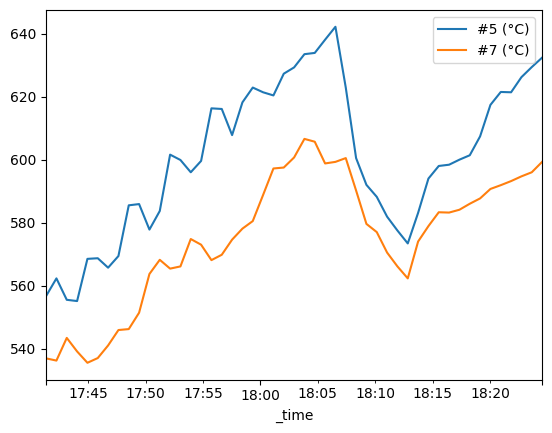

In [19]:
df_curva0.loc[((df_curva0.index.to_period('min')>'2024-04-18 17:40')&(df_curva0.index.to_period('min')<'2024-04-18 18:25')),['#5 (°C)','#7 (°C)']].plot()

In [20]:
distancias=np.array([16.11, 20.22, 25.34, 34.54 , 39.46, 44.583 , 50.8815,55.0805, 61.27, 63.4785, 68.777 , 70.8765, 76.39 , 80.374 ,85.573 ])

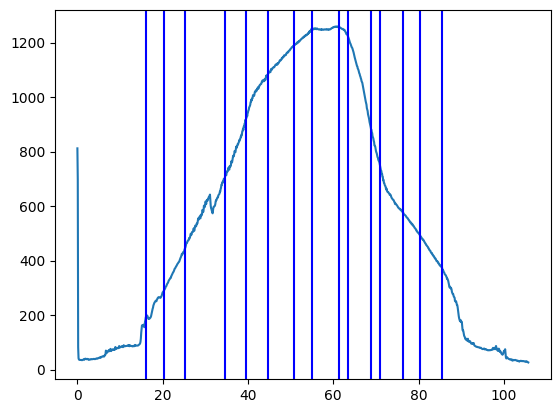

In [21]:
plt.plot(df_curva0['Distance (m)'],df_curva0['#5 (°C)'])
for j in distancias:
    plt.axvline(x = j, color = 'b')

In [688]:
df_curva0[df_curva0['Distance (m)']==16.12]

,Time (hh:mm:ss),Distance (m),#1 (°C),#2 (°C),#4 (°C),#5 (°C),#7 (°C)
_time,,,,,,,
2024-04-18 15:35:20,2:42:54,16.12,56.0,54.7,211.8,194.8,124.6


In [22]:
dftemp.loc[(dftemp.index.to_period('min')>'2024-04-18 15:30')&(dftemp.index.to_period('min')<'2024-04-18 15:40'),'k2']

C:\Users\ccollazos\AppData\Local\Temp\ipykernel_17212\779334462.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  dftemp.loc[(dftemp.index.to_period('min')>'2024-04-18 15:30')&(dftemp.index.to_period('min')<'2024-04-18 15:40'),'k2']


_time
2024-04-18 15:31:00-05:00    196.4
2024-04-18 15:32:00-05:00    198.4
2024-04-18 15:33:00-05:00    197.0
2024-04-18 15:34:00-05:00    194.4
2024-04-18 15:35:00-05:00    192.5
2024-04-18 15:36:00-05:00    191.6
2024-04-18 15:37:00-05:00    191.5
2024-04-18 15:38:00-05:00    191.9
2024-04-18 15:39:00-05:00    191.9
Freq: T, Name: k2, dtype: float64

In [22]:
col_temp_control=['k2','k4','s6','s8','s10','s12','s14','s16','s18','s20','k22','k23','k24','k25','k26']

In [23]:
empuje=cu.empuje_tiempo_proceso(15.3)
velocidad=cu.velocidad_carro(15.3)

In [25]:
carro,fechas,temperaturas=cu.temperaturas_cercanas('2024-04-18 12:52:00',velocidad,distancias,dftemp,empuje,col_temp_control)#col_temp_control

TypeError: Expected unicode, got numpy.str_

In [146]:
df_curva1=pd.read_csv(path_curvas+ls_archivos[-2], delimiter=';',encoding="cp1250", decimal=',', usecols=[0,1,2,3,4,5,6,9])

In [263]:
df_curva1=df_curva1.dropna()

In [264]:
df_curva1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063 entries, 0 to 1062
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time (hh:mm:ss)  1063 non-null   object 
 1   Distance (m)     1063 non-null   float64
 2   T1 (°C)          1063 non-null   float64
 3   T2 (°C)          1063 non-null   float64
 4   T3 (°C)          1063 non-null   float64
 5   T4 (°C)          1063 non-null   float64
 6   T5 (°C)          1063 non-null   float64
 7   T8 (°C)          1063 non-null   float64
dtypes: float64(7), object(1)
memory usage: 74.7+ KB


<Axes: >

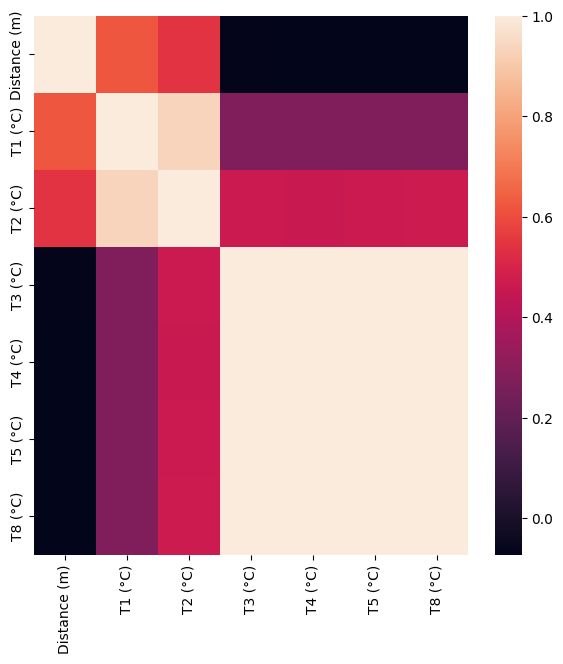

In [249]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(df_curva1[['Distance (m)', 'T1 (°C)', 'T2 (°C)', 'T3 (°C)','T4 (°C)', 'T5 (°C)', 'T8 (°C)']].corr())

In [192]:
df_curva0=df_curva0.dropna()

In [248]:
df_curva0=df_curva0[(df_curva0['Distance (m)']<=97)]

In [193]:
dfcarroc0=dftemp[cond_carro].copy()

array([<Axes: >, <Axes: >], dtype=object)

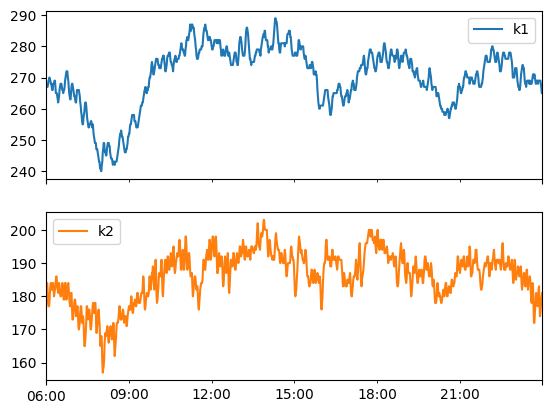

In [231]:
dfcarroc0[['k1','k2']].plot(subplots=True)

In [251]:
dia_carro_hora=dia_carro+' 06:00:00'
velocidad=6.3055

In [250]:
df_curva0.tail(1)

,Time (hh:mm:ss),Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C)
804,15:11:12,96.99,84.0,125.8,55.9,43.7,48.1,41.0,48.5,35.5


In [252]:
carro,fechas,temperaturas=temperaturas_cercanas(dia_carro_hora,velocidad,distancias,dfcarroc0,13,col_temp)

In [208]:
distancias

array([15.1195, 17.2895, 21.4885, 31.986 , 38.2845, 44.583 , 50.8815,
       55.0805, 59.2795, 63.4785, 69.777 , 71.8765, 78.175 , 82.374 ,
       86.573 ])

In [253]:
temperaturas

array([ 184,  324,  484,  739, 1020, 1131, 1209, 1210, 1171, 1104,  692,
        613,  509,  436,  293], dtype=int64)

In [254]:
df_curva0.max()

Time (hh:mm:ss)    9:59:32
Distance (m)         96.99
T1 (°C)              238.6
T2 (°C)              174.8
T3 (°C)             1247.0
T4 (°C)             1248.5
T5 (°C)             1250.8
T6 (°C)             1253.0
T7 (°C)             1251.9
T8 (°C)             1248.0
dtype: object

In [ ]:
df_curva0[((df_curva0['Distance (m)']>=2.17)& (df_curva0['Distance (m)']<=4.32)) ][['Distance (m)', 'T1 (°C)', 'T2 (°C)', 'T3 (°C)','T4 (°C)', 'T5 (°C)', 'T6 (°C)', 'T7 (°C)', 'T8 (°C)']]

,Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C)
18,2.17,42.4,40.2,46.5,42.4,39.3,36.8,51.6,40.5
19,2.29,42.6,40.3,51.4,41.4,39.2,36.5,52.6,42.5
20,2.41,42.6,40.4,55.5,39.9,39.5,36.4,51.3,43.4
21,2.53,42.7,40.5,47.7,38.7,39.9,38.5,56.9,42.2
22,2.65,42.8,40.5,44.8,39.3,40.7,38.8,58.1,45.1
23,2.77,42.4,40.7,45.7,39.8,43.8,39.2,55.6,46.8
24,2.90,42.4,40.6,45.1,40.7,52.6,41.6,61.2,48.3
25,3.02,43.4,40.8,45.4,43.0,47.1,40.2,61.5,47.6
26,3.14,43.7,40.9,46.2,42.6,47.1,39.8,57.9,45.0
27,3.26,43.6,41.0,45.4,43.8,50.4,40.5,62.1,50.8


<Axes: >

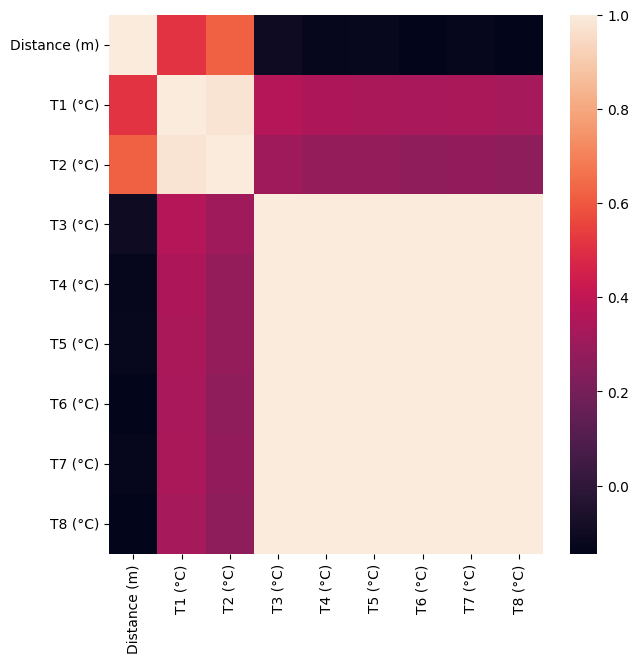

In [143]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(df_curva0[['Distance (m)', 'T1 (°C)', 'T2 (°C)', 'T3 (°C)','T4 (°C)', 'T5 (°C)', 'T6 (°C)', 'T7 (°C)', 'T8 (°C)']].corr())

<Axes: >

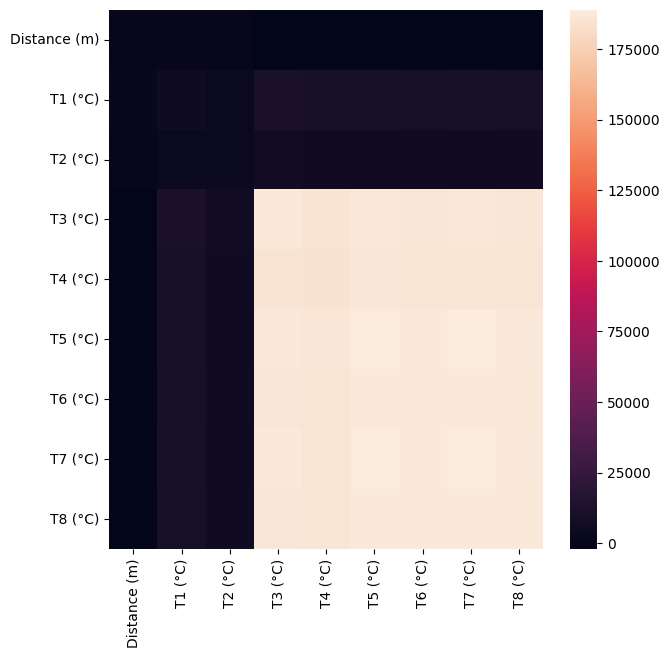

In [ ]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(df_curva0[['Distance (m)', 'T1 (°C)', 'T2 (°C)', 'T3 (°C)','T4 (°C)', 'T5 (°C)', 'T6 (°C)', 'T7 (°C)', 'T8 (°C)']].cov())

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

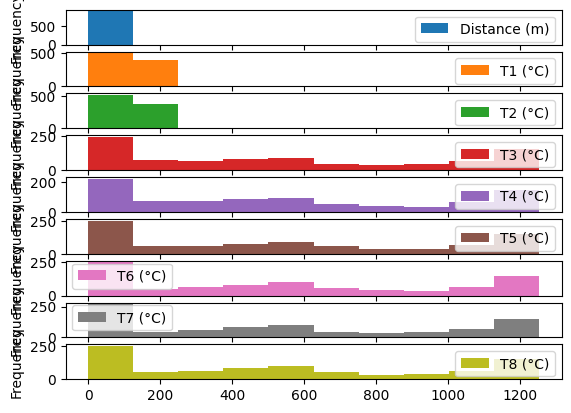

In [145]:
df_curva0[['Distance (m)', 'T1 (°C)', 'T2 (°C)', 'T3 (°C)','T4 (°C)', 'T5 (°C)', 'T6 (°C)', 'T7 (°C)', 'T8 (°C)']].plot(kind='hist', subplots=True)

In [177]:
from sklearn.decomposition import PCA

In [187]:
model_pca=PCA(2).fit_transform(df_curva0[['Distance (m)', 'T1 (°C)', 'T2 (°C)', 'T3 (°C)','T4 (°C)', 'T5 (°C)', 'T6 (°C)', 'T7 (°C)', 'T8 (°C)']])

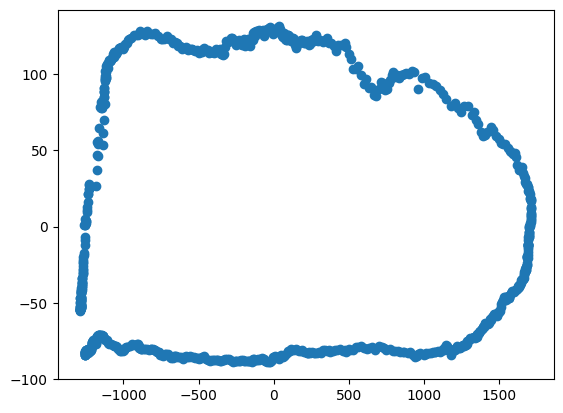

In [188]:
plt.scatter(model_pca[:,0],model_pca[:,1])

In [184]:
model_pca2=PCA(3).fit_transform(df_curva0[['Distance (m)', 'T1 (°C)', 'T2 (°C)', 'T3 (°C)','T4 (°C)', 'T5 (°C)', 'T6 (°C)', 'T7 (°C)', 'T8 (°C)']])

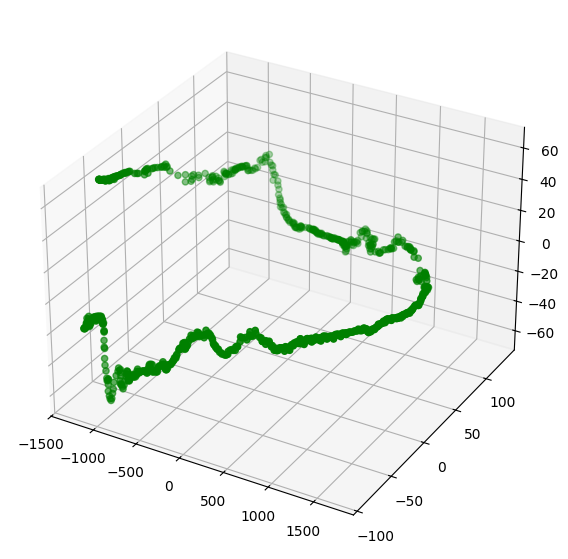

In [185]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(model_pca2[:,0], model_pca2[:,1], model_pca2[:,2], color = "green")

<Axes: >

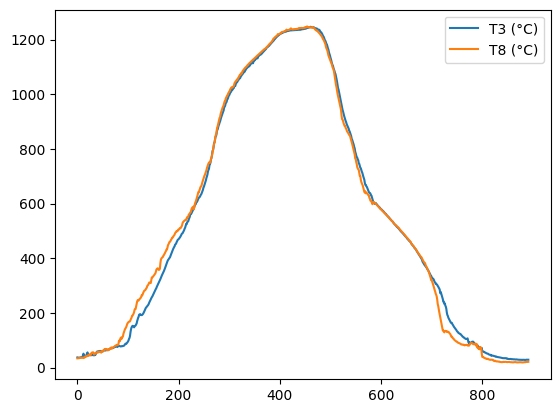

In [245]:
df_curva0[['T3 (°C)','T8 (°C)']].plot()

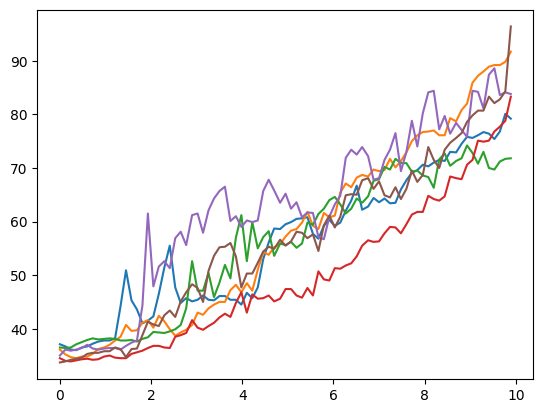

In [275]:
for i in ['T3 (°C)','T4 (°C)', 'T5 (°C)', 'T6 (°C)', 'T7 (°C)', 'T8 (°C)']:
    plt.plot(df_curva0[df_curva0['Distance (m)']<10]['Distance (m)'],df_curva0[df_curva0['Distance (m)']<10][i])

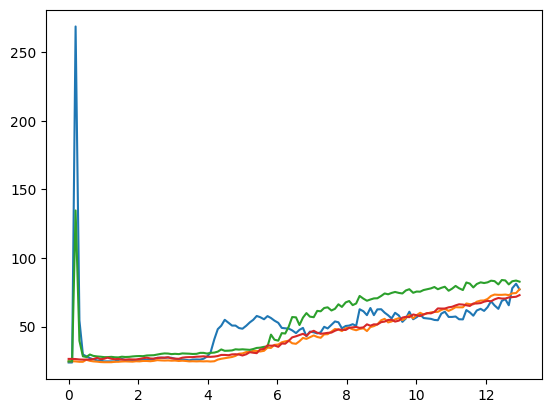

In [273]:
for i in ['T3 (°C)','T4 (°C)', 'T5 (°C)', 'T8 (°C)']:
    plt.plot(df_curva1[df_curva1['Distance (m)']<13.02]['Distance (m)'],df_curva1[df_curva1['Distance (m)']<13.02][i])

In [193]:
import modelo_ini_corona as cu

In [195]:
df_curva0.tail(5)

,Time (hh:mm:ss),Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C)
887,16:45:16,107.00,43.2,39.3,28.7,22.9,27.9,22.7,25.8,20.7
888,16:46:24,107.12,44.6,39.1,28.7,23.1,28.2,22.9,25.7,20.5
889,16:47:32,107.24,45.2,38.9,28.4,23.0,28.2,22.9,26.0,20.6
890,16:48:40,107.36,44.8,38.8,28.4,23.1,28.2,23.0,25.8,20.8
891,16:49:48,107.48,45.7,38.8,28.7,23.3,28.6,23.1,25.6,21.0


In [196]:
df_curva0.head(5)

,Time (hh:mm:ss),Distance (m),T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C)
0,0:00:00,0.00,40.4,38.3,37.1,36.1,36.5,34.5,35.0,33.7
1,0:01:08,0.12,40.7,38.4,36.7,35.2,36.4,34.0,36.1,33.9
2,0:02:16,0.24,41.8,38.6,36.1,34.7,36.5,33.9,35.9,34.2
3,0:03:24,0.36,42.1,38.7,36.0,34.5,37.1,34.1,36.1,34.4
4,0:04:32,0.48,40.7,38.8,36.5,34.8,37.5,34.3,36.4,34.6


In [197]:
velocidad=cu.velocidad_carro(15)

In [215]:
par=df_curva0[['Distance (m)','T7 (°C)']].values

In [216]:
tiemp,temp,pendientes=cu.curva_completa(par,velocidad)

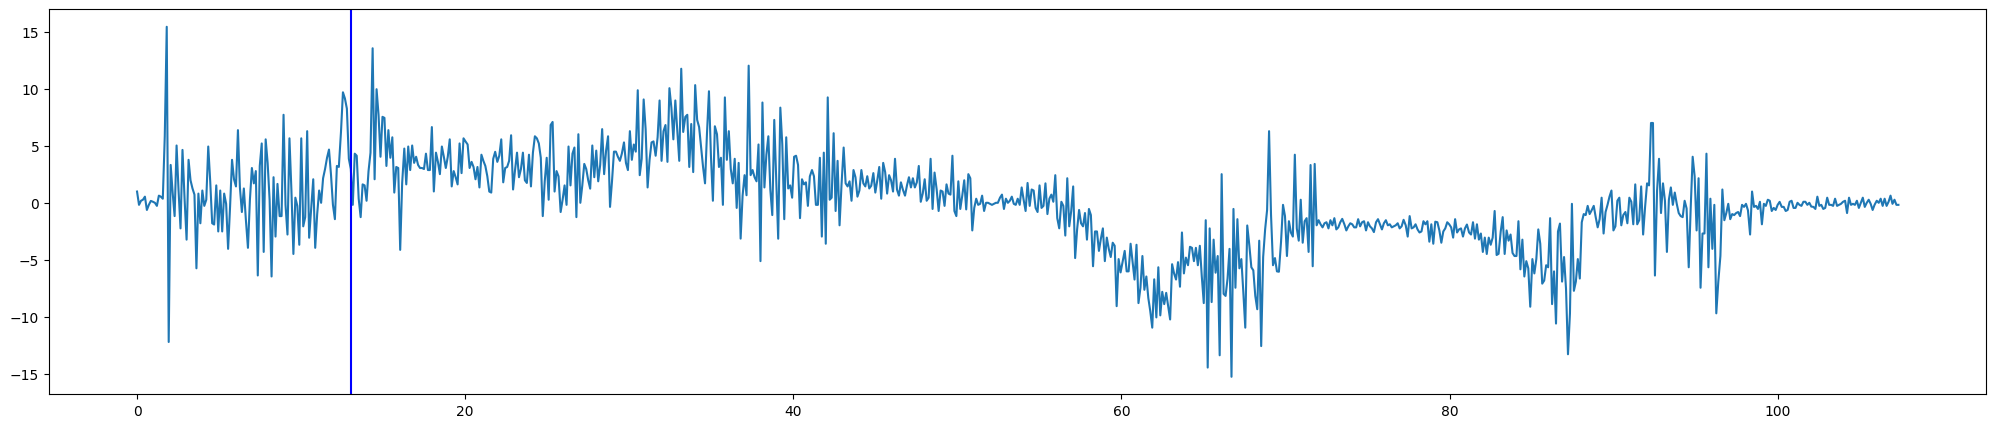

In [237]:
plt.figure(figsize=(25,5))
plt.plot(df_curva0['Distance (m)'].values[:-1],pendientes)
plt.axvline(x = 13.02, color = 'b')

(array([  6.,  10.,  43., 101., 315., 244., 125.,  37.,   8.,   2.]),
 array([-15.26851852, -12.19685185,  -9.12518519,  -6.05351852,
         -2.98185185,   0.08981481,   3.16148148,   6.23314815,
          9.30481481,  12.37648148,  15.44814815]),
 <BarContainer object of 10 artists>)

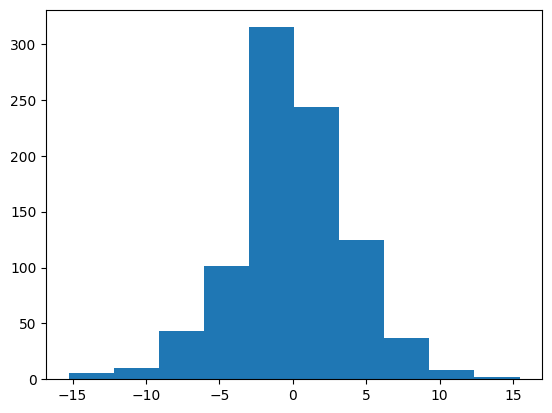

In [218]:
plt.hist(pendientes)

In [235]:
np.mean(pendientes),np.std(pendientes)

(-0.007986640702691507, 3.9582856458511397)

<Axes: ylabel='Density'>

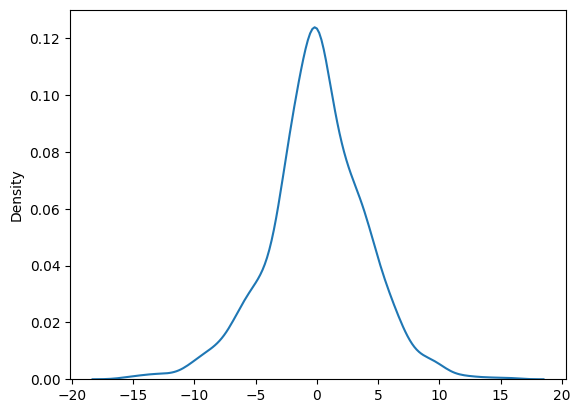

In [233]:
sns.kdeplot(pendientes)

In [ ]:
datos=cu.data_frame(tiemp,temp)

<Axes: >

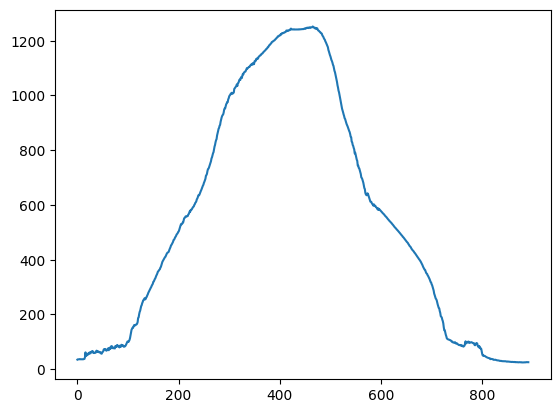

In [221]:
df_curva0['T7 (°C)'].plot()

<Axes: >

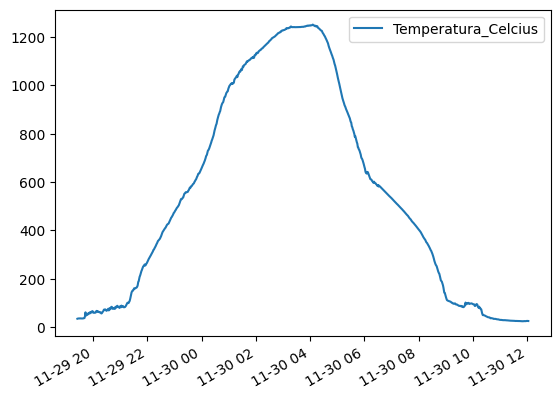

In [222]:
datos.plot()

## Visual Temp

In [37]:
import matplotlib.image as img
import matplotlib.animation as animation

In [12]:
def venana_des_sencilla_tensor(df,Tmuestas,xmuestra,ymuestra):
    X_a=[]
    y_a=[]
    for i in range(Tmuestas):
        X_a.append(df[i:i+int(xmuestra)].T)
        y_a.append(df[i+int(xmuestra):i+int(xmuestra)+int(ymuestra)].T)
    X_a=np.array(X_a)
    y_a=np.array(y_a)
    return X_a, y_a

In [15]:
dftemp_6nov.values.shape

(1079, 30)

In [20]:
X_a,y_a=venana_des_sencilla_tensor(dftemp_6nov.values,dftemp_6nov['k1'].shape[0]-79,60,5)

In [38]:
X_a.shape

(1000, 30, 60)

In [30]:
image_=(X_a[0].T/X_a[0].T.max(axis=0))

In [123]:
image_1=(X_a[59].T/X_a[59].T.max(axis=0))

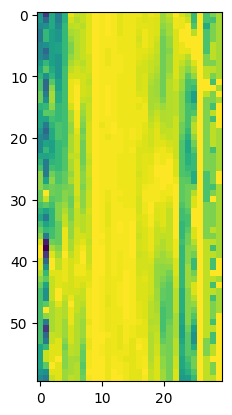

In [32]:
plt.imshow(image_) 

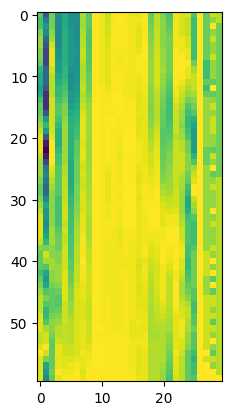

In [124]:
plt.imshow(image_1)

In [106]:
def images_gen(X):
    img_=[]
    for i in range(X.shape[0]):
        img_.append(X[i].T/X[i].T.max(axis=0))
    return np.array(img_)

In [126]:
def generador_gif_temperaturas(img_c):
    fig, ax = plt.subplots()
    ims = []
    for i in range(img_c.shape[0]):
        im = ax.imshow(img_c[i], animated=True)
        ims.append([im])
    return animation.ArtistAnimation(fig, ims, blit=True, repeat_delay=2000,  interval=50)

MovieWriter ffmpeg unavailable; using Pillow instead.


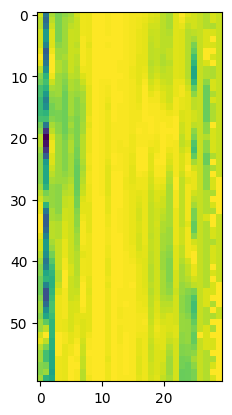

In [112]:
fig, ax = plt.subplots()

img_c=images_gen(X_a)

ims = []
for i in range(X_a.shape[0]):
    im = ax.imshow(img_c[i], animated=True)
    # if i == 0:
    #     ax.imshow(img_c[i])
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, blit=True, repeat_delay=2000,  interval=50)
ani.save("scatter_temp.gif")


plt.show()

In [99]:
dftemp_03=dftemp.iloc[cond_temp_2].copy()

In [101]:
X_b,y_b=venana_des_sencilla_tensor(dftemp_03.values,dftemp_03['k1'].shape[0]-79,60,5)

In [107]:
frames_img=images_gen(X_b)

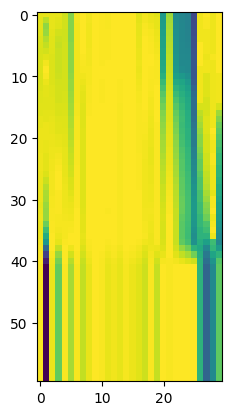

In [108]:
plt.imshow(frames_img[0])

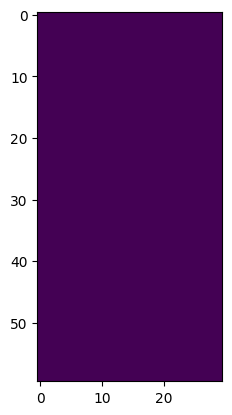

In [116]:
plt.imshow(frames_img[41])

In [117]:
ims = []
for i in range(X_b.shape[0]):
    im = ax.imshow(frames_img[i], animated=True)
    # if i == 0:
    #     ax.imshow(img_c[i])
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, blit=True, repeat_delay=2000,  interval=50)
ani.save("scatter_temp_falla.gif")


plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


# modelamiento kcal

In [208]:
df_data_prod=pd.read_csv('Data_kcal_kg.csv')
df_data_prod.columns

Index(['_time', 'c_carros', 'tp', 'toneladas', 'flujo_masico', 'distribucion',
       'consumo'],
      dtype='object')

In [427]:
fechas_kcal_=df_data_prod._time.apply(lambda x: x[:10]).values

In [528]:
np.where('k26'==dftemp.columns)

(array([25], dtype=int64),)

# Modelo 2

In [261]:
id_dia=dftemp.index.strftime('%Y-%m-%d').values

In [16]:
id_hora=dftemp.index.strftime('%H:%M').values

In [27]:
turnos_=np.where(id_hora=='06:00')[0]

In [51]:
turnos_.shape

(354,)

In [400]:
id_dia[turnos_[0]]

'2024-01-01'

In [430]:
temp_ent=[]#np.zeros(shape=(353,1440,26))

In [431]:
dia_=[]
for _ in range(len(turnos_)-1):
    if id_dia[turnos_[_]] in fechas_kcal_:
        dia_.append(id_dia[turnos_[_]])
        temp_ent.append(dftemp.iloc[turnos_[_]:turnos_[_+1], 0:len(termo_pares)].values)

In [432]:
temp_ent=np.array(temp_ent)

In [436]:
temp_ent[0].shape

(1440, 26)

## Modelo Red

In [566]:
objetivo_v=[]
masa=[]
tp_=[]
for a,b in enumerate(fechas_kcal_):
    if b in dia_:
        objetivo_v.append([df_data_prod.iloc[a,6]])
        masa.append(df_data_prod.iloc[a,3])
        tp_.append(df_data_prod.iloc[a,2])

In [456]:
X=temp_ent.copy()

In [457]:
y=np.array(objetivo_v)

In [449]:
import tensorflow as tf # type: ignore
from keras import Sequential # type: ignore
from keras.layers import Dense,Flatten, Input # type: ignore

In [475]:
model_ejemplo=Sequential(name='modelo_surrogativo_burdo')
#model_rn.add(Flatten(input_shape=(30,15)))
model_ejemplo.add(Input(shape=(1440,26)))
model_ejemplo.add(Dense(10, activation='relu'))
# model_ejemplo.add(Dense(45, activation='linear'))
# model_ejemplo.add(Dense(25, activation='linear'))
model_ejemplo.add(Flatten())
model_ejemplo.add(Dense(1, activation='linear'))

In [488]:
model_ejemplo.compile(optimizer='adam', loss='mae', metrics=['mae','mse', 'mape'])

In [489]:
model_ejemplo.fit(X,y, epochs=8, batch_size=10)

Epoch 1/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 625.0821 - mae: 625.0821 - mape: 52.1968 - mse: 655991.6250
Epoch 2/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.3054 - mae: 89.3054 - mape: 7.4313 - mse: 13075.8545  
Epoch 3/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 104.4401 - mae: 104.4401 - mape: 8.6816 - mse: 15682.1064
Epoch 4/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 76.7792 - mae: 76.7792 - mape: 6.3761 - mse: 9882.4277
Epoch 5/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155.9382 - mae: 155.9382 - mape: 12.7352 - mse: 36402.5352 
Epoch 6/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 95.9660 - mae: 95.9660 - mape: 7.8814 - mse: 15979.8457 
Epoch 7/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 88.5971 - mae: 88.5971 - mape: 7.3210 - mse: 12977.2842
Epoch 8/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 80.1318 - mae: 80.1318 - mape: 6.6229 - mse: 10143.1885


In [490]:
yhat=model_ejemplo.predict(X)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


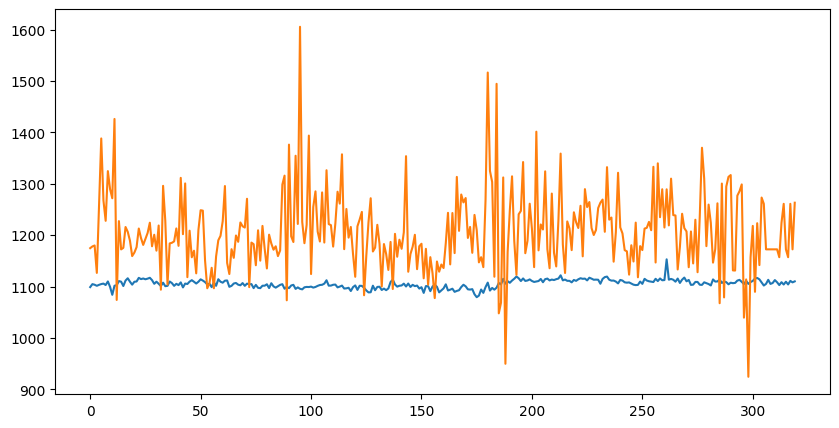

In [491]:
plt.figure(figsize=(10,5))
plt.plot(yhat.reshape(-1,))
plt.plot(y.reshape(-1,))

Text(0, 0.5, 'kcal/kg')

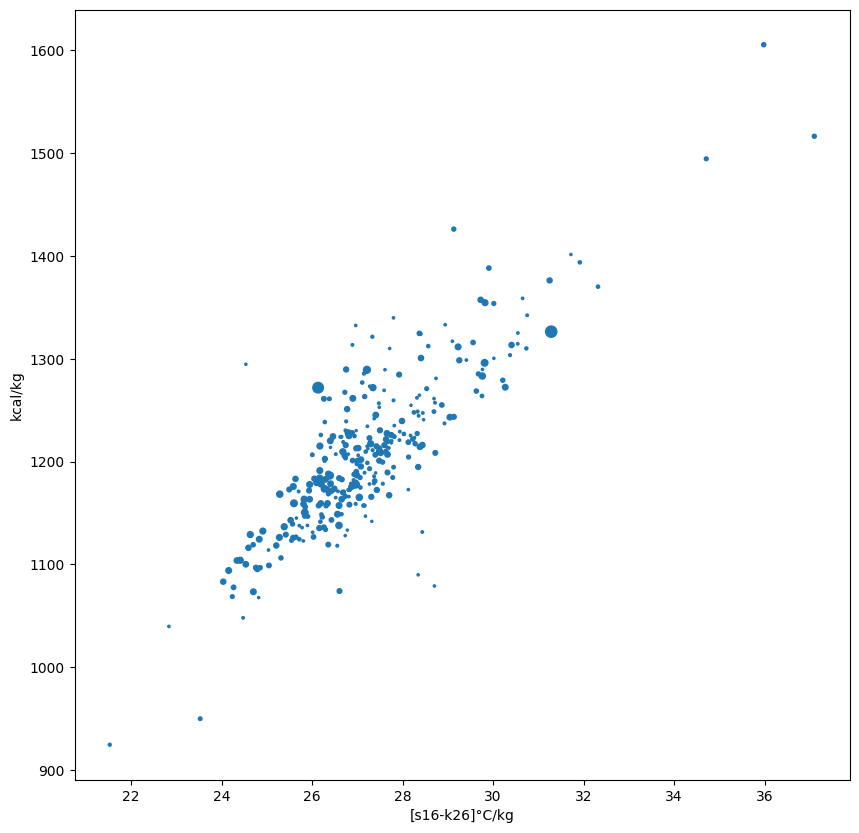

In [581]:
enfriamiento_=(temp_ent[:,:,15]-temp_ent[:,:,25]).sum(axis=1)/(np.array(masa)*1000)
plt.figure(figsize=(10,10))
plt.scatter(enfriamiento_,y.reshape(-1,), s=(temp_ent[:,:,15]-temp_ent[:,:,25]).std(axis=1))
plt.xlabel('[s16-k26]°C/kg')
plt.ylabel('kcal/kg')

Text(0, 0.5, 'kcal/kg')

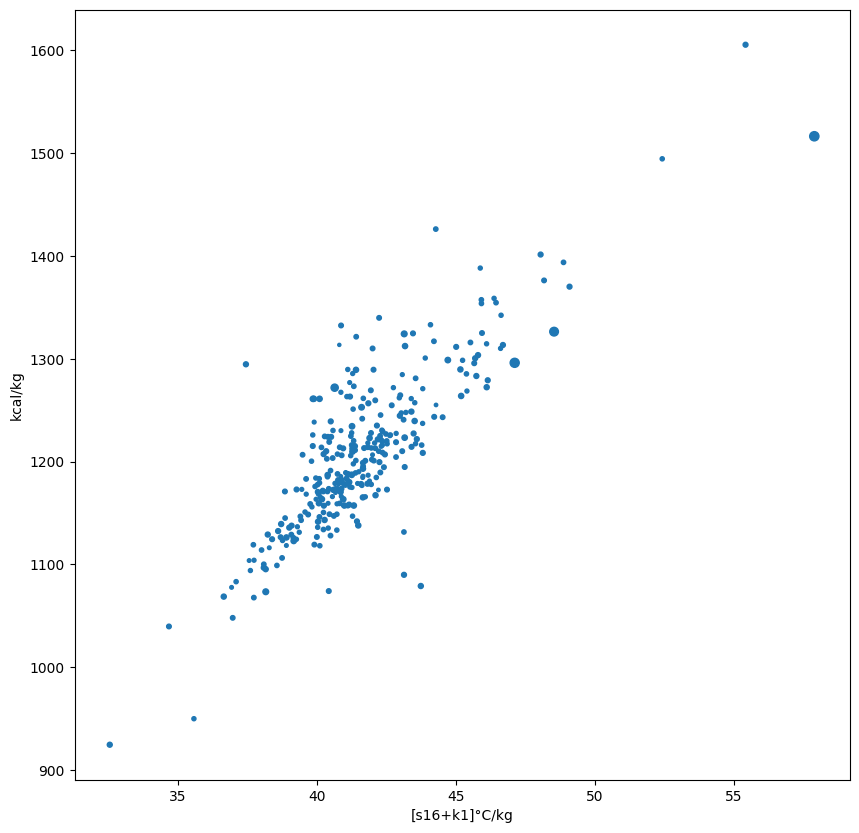

In [700]:
coccion_=(temp_ent[:,:,1]+temp_ent[:,:,15]).sum(axis=1)/(np.array(masa)*1000)
plt.figure(figsize=(10,10))
plt.scatter(coccion_,y.reshape(-1,),s=(temp_ent[:,:,0]+temp_ent[:,:,15]).std(axis=1))
plt.xlabel('[s16+k1]°C/kg')
plt.ylabel('kcal/kg')

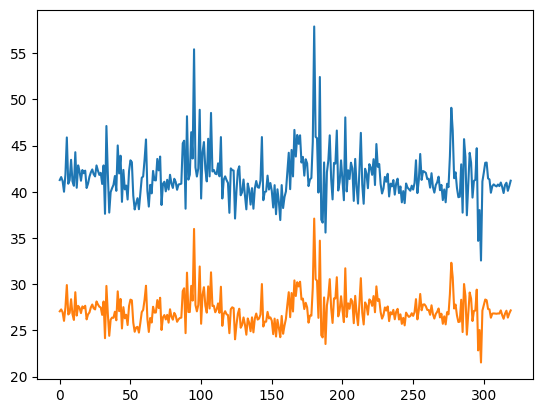

In [703]:
plt.plot(coccion_)
plt.plot(enfriamiento_)

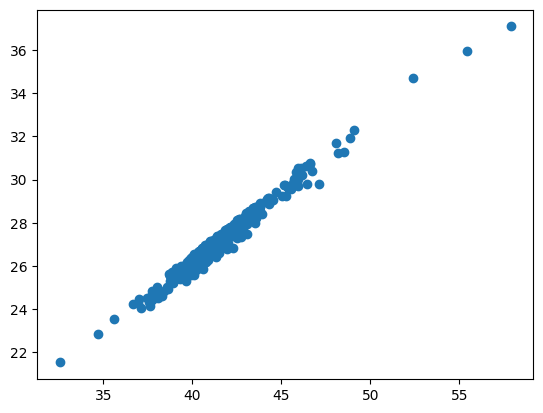

In [701]:
plt.scatter(coccion_,enfriamiento_)

In [702]:
(coccion_/enfriamiento_).mean()

1.529416292461636

In [596]:
dftemp.iloc[:,len(termo_pares):].describe().T

,count,mean,std,min,25%,50%,75%,max
k1sp,509194.0,270.000000,0.000000e+00,270.0,270.0,270.0,270.0,270.00
k21sp,509194.0,650.000000,0.000000e+00,650.0,650.0,650.0,650.0,650.00
k22sp,509194.0,670.000000,0.000000e+00,670.0,670.0,670.0,670.0,670.00
k23sp,509194.0,620.000000,0.000000e+00,620.0,620.0,620.0,620.0,620.00
k24sp,509194.0,520.000000,0.000000e+00,520.0,520.0,520.0,520.0,520.00
k25sp,509194.0,440.000000,0.000000e+00,440.0,440.0,440.0,440.0,440.00
k26sp,509194.0,289.467604,1.605125e+00,280.0,290.0,290.0,290.0,291.00
k27sp,509194.0,110.000000,0.000000e+00,110.0,110.0,110.0,110.0,110.00
k2sp,509194.0,170.000000,0.000000e+00,170.0,170.0,170.0,170.0,170.00
k3sp,509194.0,390.000000,0.000000e+00,390.0,390.0,390.0,390.0,390.00


# Modelo 02

In [206]:
from sklearn.tree import DecisionTreeRegressor

In [224]:
df_data_prod['velocidad']=97/df_data_prod['tp']

In [240]:
df_data_prod.columns

Index(['_time', 'c_carros', 'tp', 'toneladas', 'flujo_masico', 'distribucion',
       'consumo', 'velocidad'],
      dtype='object')

In [241]:
X_prod=df_data_prod[['toneladas', 'flujo_masico', 'distribucion']].values
y_obj=df_data_prod['consumo'].values

In [242]:
md_desicion_tree=DecisionTreeRegressor().fit(X_prod,y_obj)

In [243]:
md_desicion_tree.feature_importances_

array([0.68276772, 0.1126799 , 0.20455238])

In [247]:
md_desicion_tree.score(X_prod,y_obj)

0.9347960233147359

<Axes: >

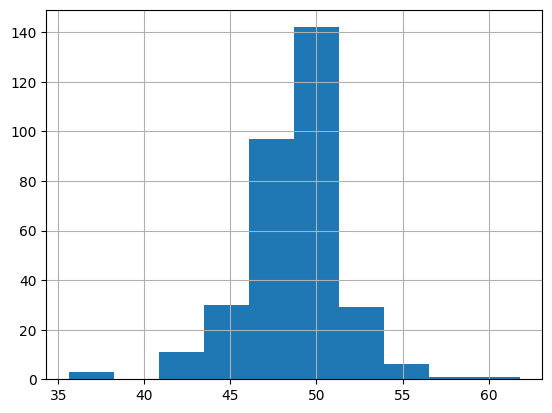

In [259]:
df_data_prod['toneladas'].hist()

<Axes: >

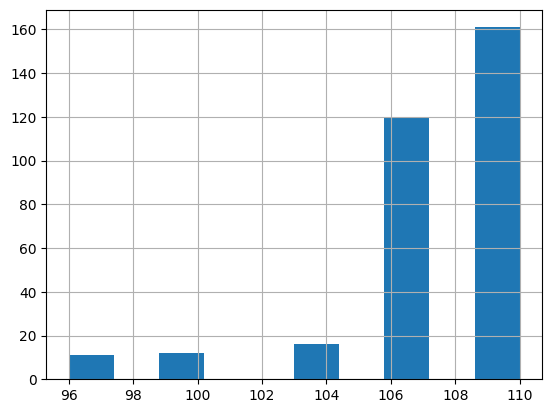

In [281]:
df_data_prod['c_carros'].hist()

<Axes: >

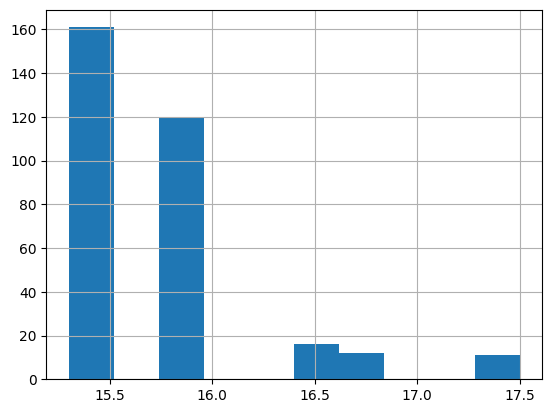

In [284]:
df_data_prod['tp'].hist()

In [296]:
ejemplo=df_data_prod.loc[pd.to_datetime(df_data_prod['_time']).between('2024-10-01','2024-10-31')][['_time','c_carros','tp','toneladas']].copy()

In [300]:
df_data_prod.loc[pd.to_datetime(df_data_prod['_time']).between('2024-10-01','2024-10-31')].head()

,_time,c_carros,tp,toneladas,flujo_masico,distribucion,consumo,velocidad
265,2024-10-01T00:00:00.000-05:00,106,15.9,50.500,3.18,2.1000,1238.363543,6.100629
266,2024-10-02T00:00:00.000-05:00,106,15.9,49.596,3.12,2.1373,1133.274528,6.100629
267,2024-10-03T00:00:00.000-05:00,106,15.9,49.130,3.09,2.1580,1177.215008,6.100629
268,2024-10-04T00:00:00.000-05:00,110,15.3,48.500,3.17,2.2700,1241.666463,6.339869
269,2024-10-05T00:00:00.000-05:00,110,15.3,50.290,3.29,2.1870,1213.757035,6.339869


In [320]:
prod_=ejemplo['toneladas'].values

In [384]:
valor_obj=df_data_prod.loc[pd.to_datetime(df_data_prod['_time']).between('2024-10-01','2024-10-31')]['consumo'].values

In [386]:
def formar_escenarios(masa):
    valoes_=np.linspace(0,14,15)
    c_carros=valoes_+96
    tiemo_horno=np.round(-0.1467*valoes_+17.6,2)
    prod_02=np.array([masa for _ in range(15)])
    sim0_=np.zeros(shape=(15,3))
    sim0_[:,0]=prod_02
    sim0_[:,1]=prod_02/tiemo_horno
    sim0_[:,2]=c_carros/prod_02
    return sim0_,c_carros,tiemo_horno

In [387]:
def calculo_diferencia(masa):
    ecenarios,c_carros,tiemo_horno=formar_escenarios(masa)
    y_hat=md_desicion_tree.predict(ecenarios)
    valor_minimo=y_hat.argmin()
    return y_hat[valor_minimo],tiemo_horno[valor_minimo],c_carros[valor_minimo]


In [395]:
b=[]
for i,j in enumerate(prod_):
    valor_ahorro,tp,carros=calculo_diferencia(j)
    b.append(valor_obj[i]-valor_ahorro)

In [399]:
sum(b)*6600

22286232.233099997